In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## **Unique Authors Data**

In [2]:
wacv = pd.read_csv(r"data\WACV through the years.csv")
cvpr = pd.read_csv(r"data\CVPR through the years.csv")
iccv = pd.read_csv(r"data\ICCV through the years.csv")
eccv = pd.read_csv(r"data\ECCV through the years.csv")
bmvc = pd.read_csv(r"data\BMVC through the years.csv")

combined_df = pd.concat([wacv, cvpr, iccv, eccv, bmvc], keys=['WACV', 'CVPR', 'ICCV', 'ECCV', 'BMVC'])

## **New Authors from Each Conferences**

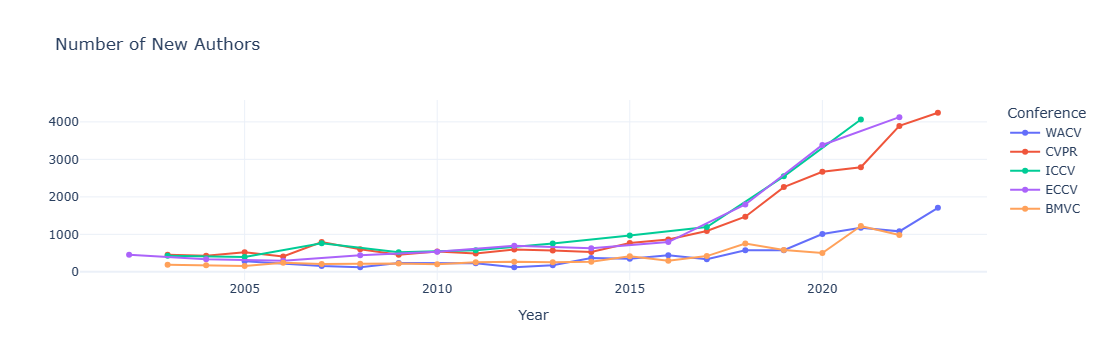

In [22]:
fig = px.line(combined_df, x='conference_year', y='unique_author_count', color='conference_name',
              markers=True, labels={'conference_year': 'Year', 'unique_author_count': '', 'conference_name': 'Conference'},
              title='Number of New Authors', template='plotly_white')

fig

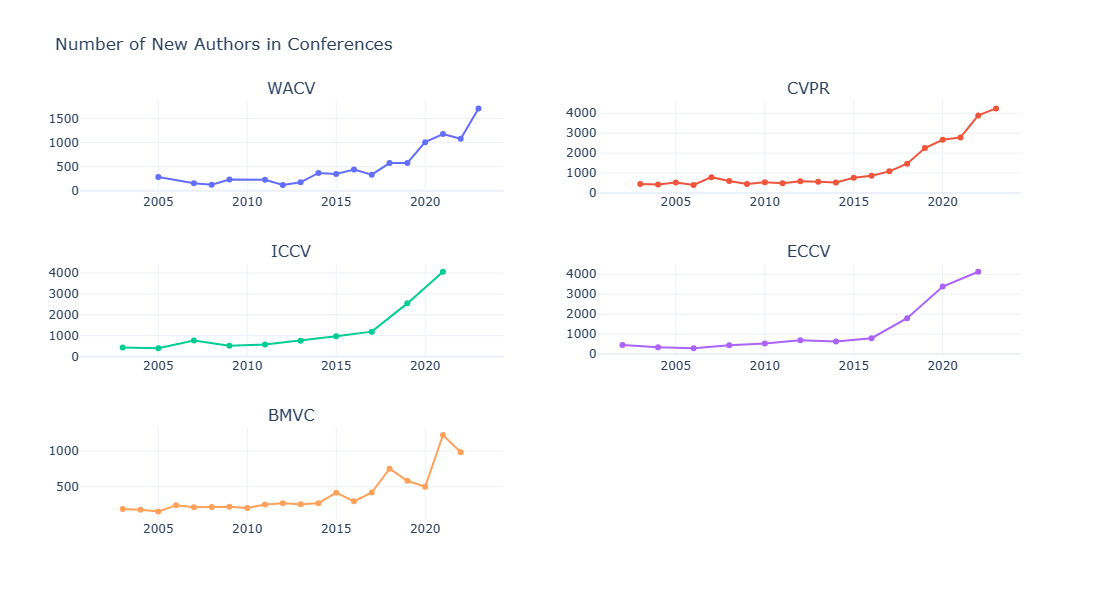

In [5]:
conferences = combined_df.index.get_level_values(0).unique()

fig = sp.make_subplots(rows=3, cols=2, subplot_titles=[f'{conf}' for conf in conferences])

for i, conference in enumerate(conferences):
    conference_df = combined_df.loc[conference]
    row = i // 2 + 1  
    col = i % 2 + 1  
    trace = go.Scatter(x=conference_df['conference_year'],
                       y=conference_df['unique_author_count'],
                       mode='lines+markers', name=f'{conference}')
    fig.add_trace(trace, row=row, col=col)

    fig.update_xaxes(matches='x', row=row, col=col)

fig.update_layout(height=600, width=1100, title_text="Number of New Authors in Conferences",
                  showlegend=False, template='plotly_white')

fig.show()

**The graph above illustrates the annual distribution of new authors contributing to each conference. Evidently, there is a noticably upward trend, indicating a consistent increase in the number of authors participating each year. This pattern reflects the dynamic growth of the field, suggesting a rising interest and expanding knowledge base among individuals. The data strongly suggests a newfound enthusiasm and a deepening understanding within this domain, underscoring its progressive trajectory.**

## **Number of Papers**

In [6]:
papers = pd.read_csv(r"data\Number of Papers by Conference Year.csv")
papers.head()

Conference  Year  Number of Papers
0       BMVC  2003                81
1       BMVC  2004                99
2       BMVC  2005                96
3       BMVC  2006               130
4       BMVC  2007               114

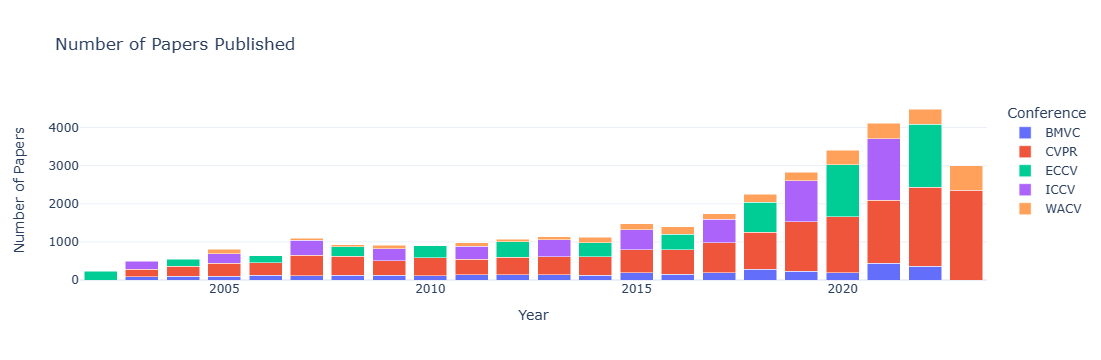

In [7]:
fig = px.bar(papers, x='Year', y='Number of Papers', color='Conference',
             title='Number of Papers Published', template='plotly_white',
             hover_name= 'Year',
             barmode='stack')

fig.show()

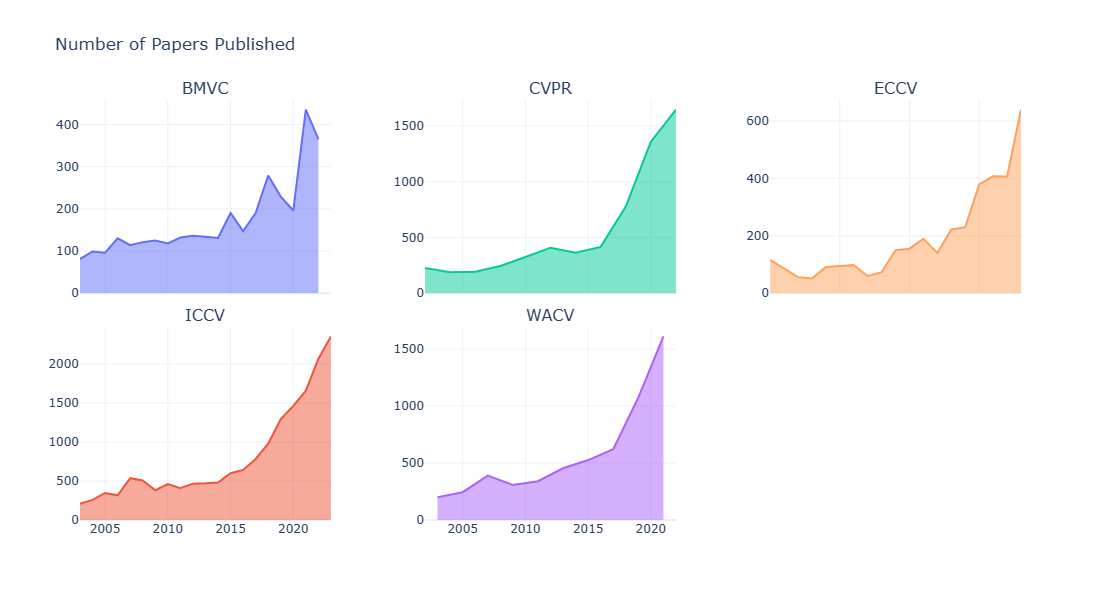

In [8]:
conferences = papers['Conference'].unique()

fig = make_subplots(rows=2, cols=3, subplot_titles=conferences,
                    shared_xaxes=True, vertical_spacing=0.08, horizontal_spacing=0.1)

for i, conf in enumerate(conferences):
    conf_data = papers[papers['Conference'] == conf]
    area_trace = go.Scatter(x=conf_data['Year'], y=conf_data['Number of Papers'],
                            mode='lines', fill='tozeroy', name=conf)
    row = i % 2 + 1
    col = i // 2 + 1
    fig.add_trace(area_trace, row=row, col=col)

fig.update_layout(title_text='Number of Papers Published', width=1000, height=600, showlegend=False, template='plotly_white')

fig.update_yaxes(title_text='Number of Papers Published', row=2, col=3)

fig.show()

## **Papers Published by ASEAN Authors**

In [9]:
sea_papers = pd.read_csv(r"data\Papers published by South East Asia Countries.csv")
sea_papers.head()

Conference  Year Country Name  Number of Papers
0       ECCV  2002     Cambodia                 3
1       ECCV  2002     Malaysia                 1
2       ECCV  2002      Vietnam                 3
3       ICCV  2003     Cambodia                 1
4       ICCV  2003    Indonesia                 2

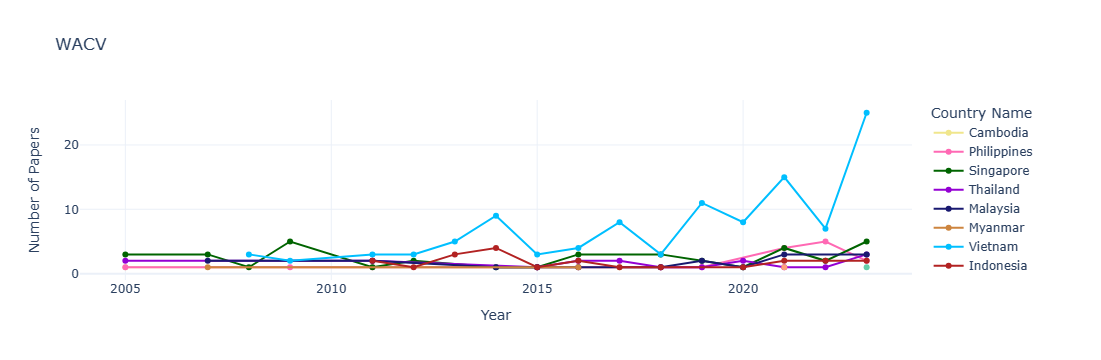

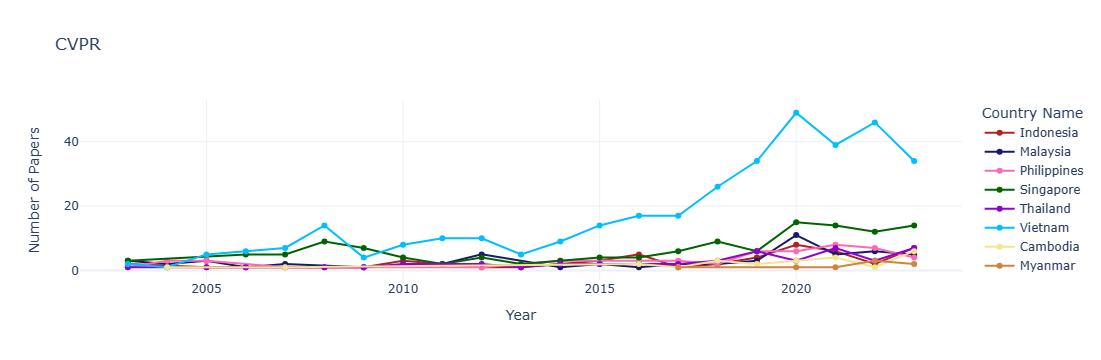

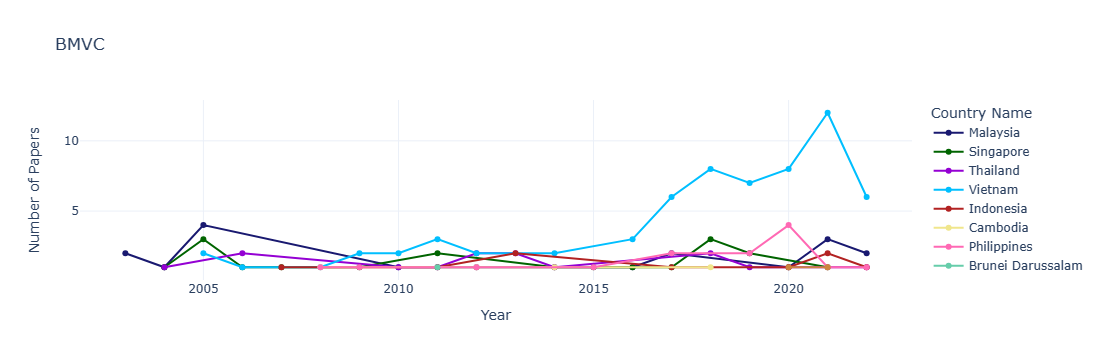

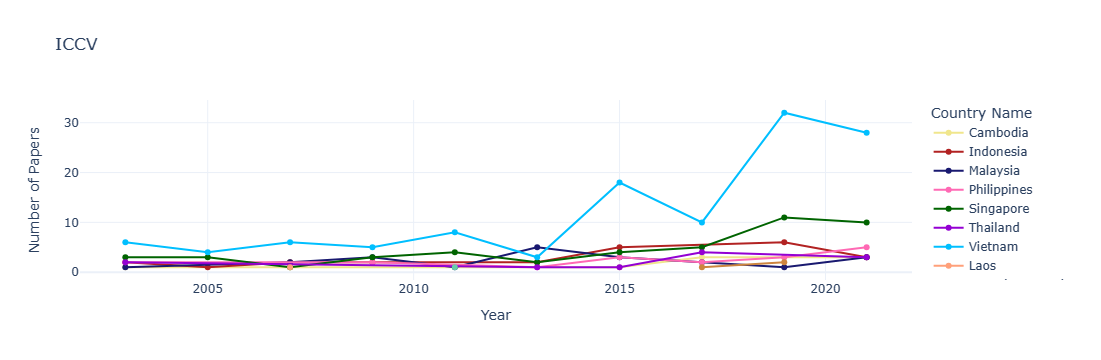

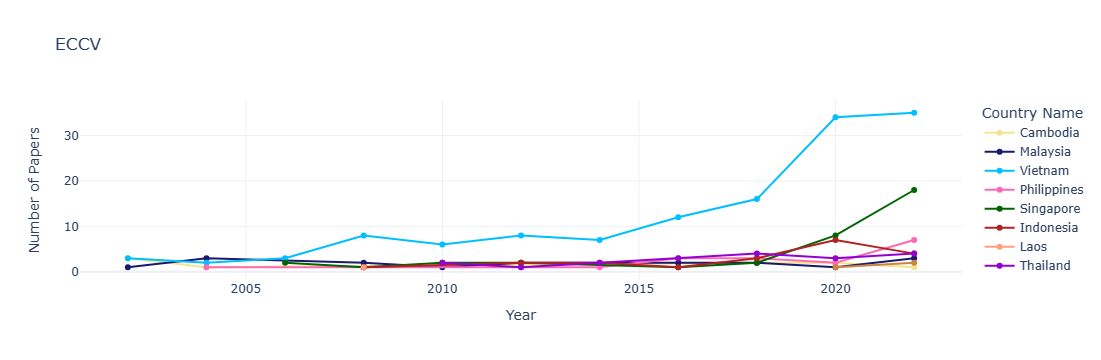

In [10]:
wacv_data = sea_papers[sea_papers['Conference'] == 'WACV']
bmcv_data = sea_papers[sea_papers['Conference'] == 'BMVC']
iccv_data = sea_papers[sea_papers['Conference'] == 'ICCV']
cvpr_data = sea_papers[sea_papers['Conference'] == 'CVPR']
eccv_data = sea_papers[sea_papers['Conference'] == 'ECCV']

color_map = {'Indonesia': 'FireBrick',
            'Malaysia': 'MidnightBlue',
            'Singapore': 'DarkGreen',
            'Thailand': 'DarkViolet',
            'Vietnam': 'DeepSkyBlue',
            'Philippines': 'HotPink',
            'Cambodia': 'Khaki',
            'Laos': 'LightSalmon',
            'Brunei Darussalam': 'MediumAquaMarine',
             'Myanmar': 'Peru'
            }

fig_wacv = px.line(wacv_data, x='Year', y='Number of Papers', title='WACV', color='Country Name',
                   template='plotly_white', hover_name='Country Name', markers=True, color_discrete_map=color_map)
fig_bmvc = px.line(bmcv_data, x='Year', y='Number of Papers', title='BMVC', color='Country Name',
                   template='plotly_white', hover_name='Country Name', markers=True, color_discrete_map=color_map)
fig_iccv = px.line(iccv_data, x='Year', y='Number of Papers', title='ICCV', color='Country Name',
                   template='plotly_white', hover_name='Country Name', markers=True, color_discrete_map=color_map)
fig_cvpr = px.line(cvpr_data, x='Year', y='Number of Papers', title='CVPR', color='Country Name',
                   template='plotly_white', hover_name='Country Name', markers=True, color_discrete_map=color_map)
fig_eccv = px.line(eccv_data, x='Year', y='Number of Papers', title='ECCV', color='Country Name',
                   template='plotly_white', hover_name='Country Name', markers=True, color_discrete_map=color_map)

fig_wacv.show()
fig_cvpr.show()
fig_bmvc.show()
fig_iccv.show()
fig_eccv.show()

## **Authors from South East Asia**

In [11]:
sea_authors = pd.read_csv(r"data\SEA Data.csv")
sea_authors.head()

Country Name          Top Author  Number of Papers by Country  \
0      Vietnam           Long Quan                          785   
1    Singapore       Tat-Seng Chua                          266   
2     Thailand  Soravit Changpinyo                          111   
3  Philippines      Lawrence Carin                          126   
4     Malaysia    Loong-Fah Cheong                          130   

   Number of Authors from Country  
0                             365  
1                             124  
2                              70  
3                              59  
4                              45

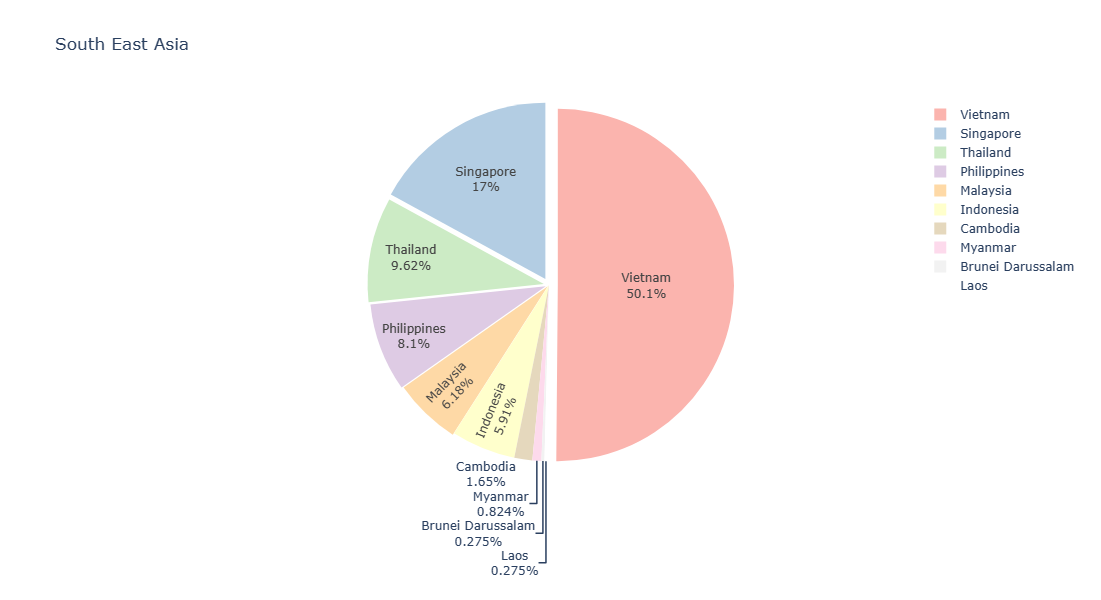

In [12]:
fig = px.pie(sea_authors, names='Country Name', values='Number of Authors from Country', color_discrete_sequence=px.colors.qualitative.Pastel1,
            title='South East Asia', hover_name = 'Top Author', hover_data='Number of Papers by Country')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', pull=[0.05,0.04,0.03, 0.02, 0.01, 0, 0, 0, 0, 0])
fig.update_layout(width=1000, height=600)
fig

Both graphs above illustrates how many papers are published by South East Asian authors. As we can see, Vietnam seems to be leading ahead by quite some distance in terms of the number of authors and number of papers published, followed by Singapore. As for **Indonesia**, we have only published 124 papers coming from 43 different authors through these 5 conferences (2002-2023).

Disclaimer: The nationalities of the authors is not 100% accurate since I use a prediction nationality API based on their names.

## **Number of Papers Published by Subregion**

In [13]:
papers_subregion = pd.read_csv(r"data\Number of Papers by Subregion.csv")
papers_subregion.head()

Subregion Continent  Number of Authors  Number of Papers  \
0  Australia and New Zealand   Oceania                197               448   
1                 Carribbean  Americas                244               881   
2            Central America  Americas                163               403   
3               Central Asia      Asia                 35                71   
4             Eastern Africa    Africa                156               353   

  Top Publishing Country  
0            New Zealand  
1                Jamaica  
2                 Mexico  
3             Uzbekistan  
4                  Kenya

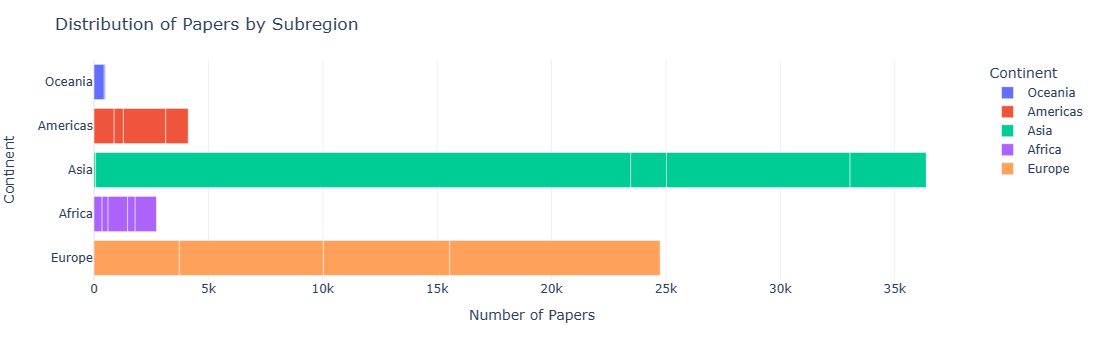

In [14]:
fig = px.bar(
    papers_subregion,
    y='Continent',
    x='Number of Papers',
    color='Continent',
    hover_data={'Top Publishing Country', 'Number of Authors'},
    hover_name='Subregion',
    template = 'plotly_white'
)

fig.update_layout(title='Distribution of Papers by Subregion')
fig.show()

## **Papers Published by Indonesian Authors**

In [16]:
indonesian_papers = pd.read_csv("data/Papers published by Indonesian Authors.csv")
indonesian_papers.head()

Conference  Year  Number of Papers  Number of Authors
0       BMVC  2007                 1                  1
1       BMVC  2011                 1                  1
2       BMVC  2013                 2                  2
3       BMVC  2017                 1                  1
4       BMVC  2020                 1                  1

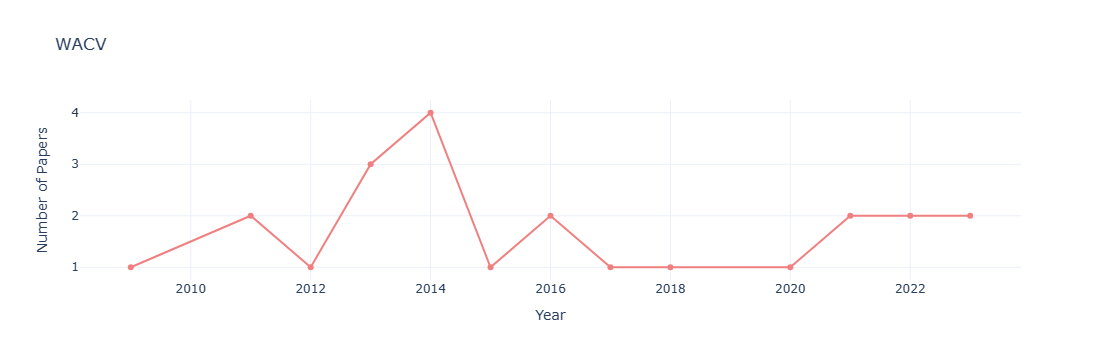

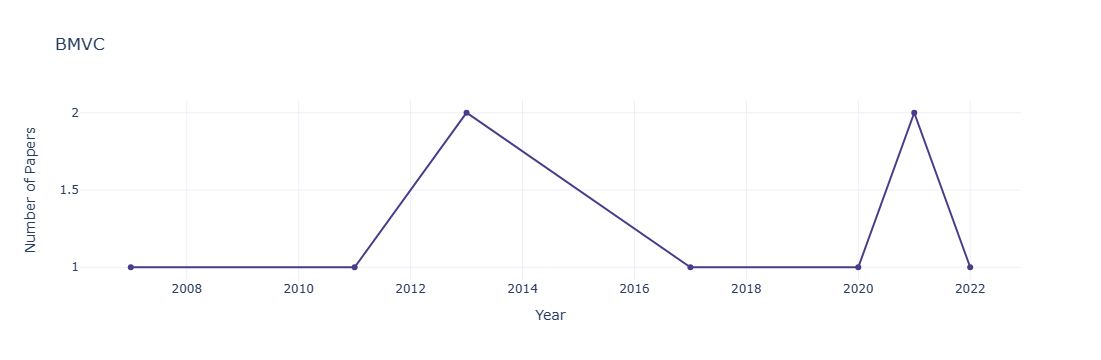

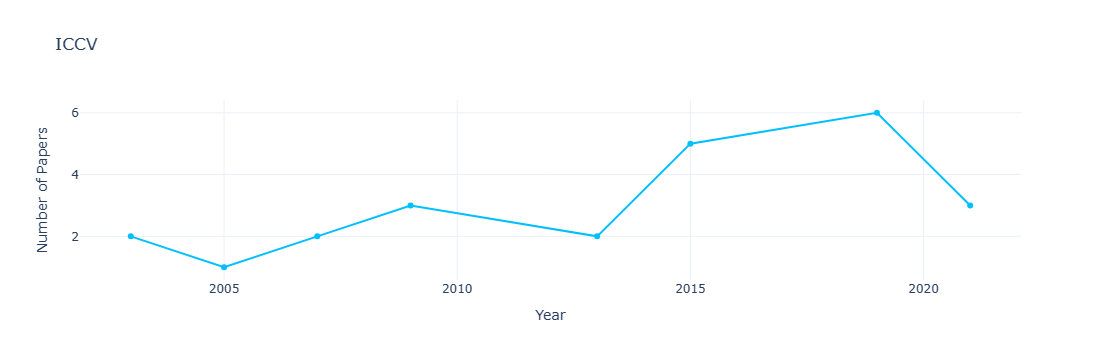

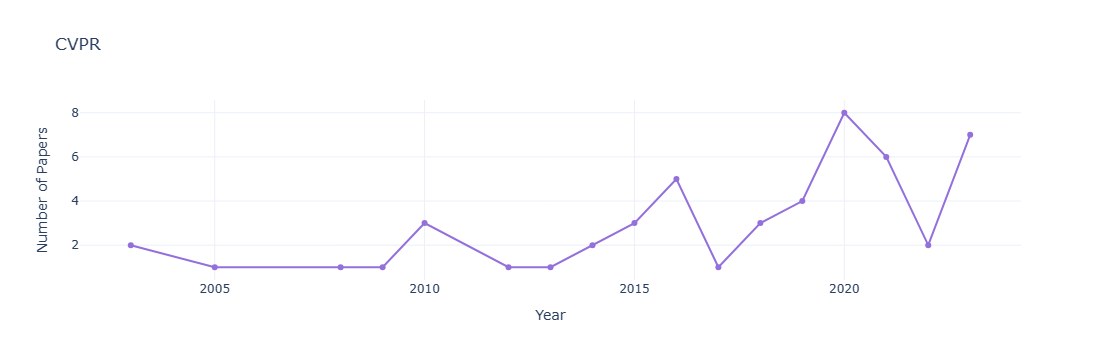

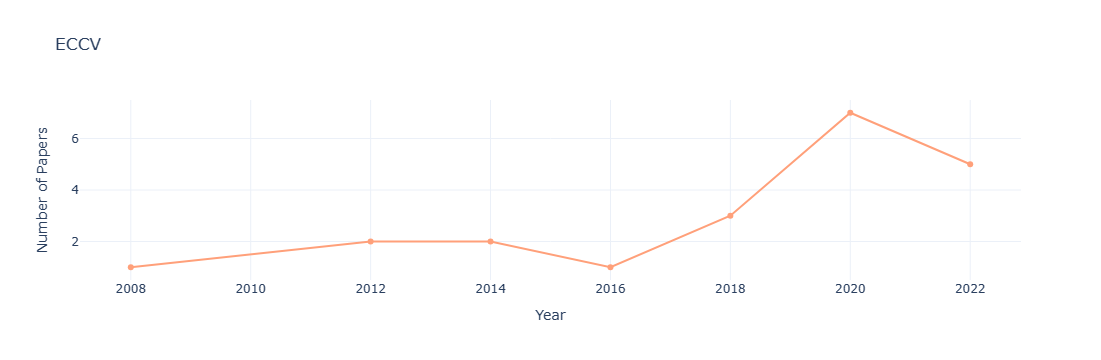

In [17]:
wacv_data = indonesian_papers[indonesian_papers['Conference'] == 'WACV']
bmcv_data = indonesian_papers[indonesian_papers['Conference'] == 'BMVC']
iccv_data = indonesian_papers[indonesian_papers['Conference'] == 'ICCV']
cvpr_data = indonesian_papers[indonesian_papers['Conference'] == 'CVPR']
eccv_data = indonesian_papers[indonesian_papers['Conference'] == 'ECCV']

fig_wacv = px.line(wacv_data, x='Year', y='Number of Papers', title='WACV', hover_data = 'Number of Authors',
                  template = 'plotly_white', hover_name='Year', markers=True)
fig_bmvc = px.line(bmcv_data, x='Year', y='Number of Papers', title='BMVC', hover_data = 'Number of Authors',
                  template = 'plotly_white', hover_name='Year', markers=True)
fig_iccv = px.line(iccv_data, x='Year', y='Number of Papers', title='ICCV', hover_data = 'Number of Authors',
                  template = 'plotly_white', hover_name='Year', markers=True)
fig_cvpr = px.line(cvpr_data, x='Year', y='Number of Papers', title='CVPR', hover_data = 'Number of Authors',
                  template = 'plotly_white', hover_name='Year', markers=True)
fig_eccv = px.line(eccv_data, x='Year', y='Number of Papers', title='ECCV', hover_data = 'Number of Authors',
                  template = 'plotly_white', hover_name='Year', markers=True)

fig_wacv.update_traces(line_color='LightCoral')
fig_bmvc.update_traces(line_color='DarkSlateBlue')
fig_iccv.update_traces(line_color='DeepSkyBlue')
fig_cvpr.update_traces(line_color='MediumPurple')
fig_eccv.update_traces(line_color='LightSalmon')

fig_wacv.show()
fig_bmvc.show()
fig_iccv.show()
fig_cvpr.show()
fig_eccv.show()

## **Indonesian Authors Contribution**

In [18]:
indonesian_authors = pd.read_csv('data/Indonesian Authors.csv')
indonesian_authors.head()

Indonesian Authors  Papers Published
0              Nolang Fanani                 1
1         Avan Suinesiaputra                 1
2             Siska Fitriani                 1
3            Naufal Suryanto                 1
4  Harashta Tatimma Larasati                 1

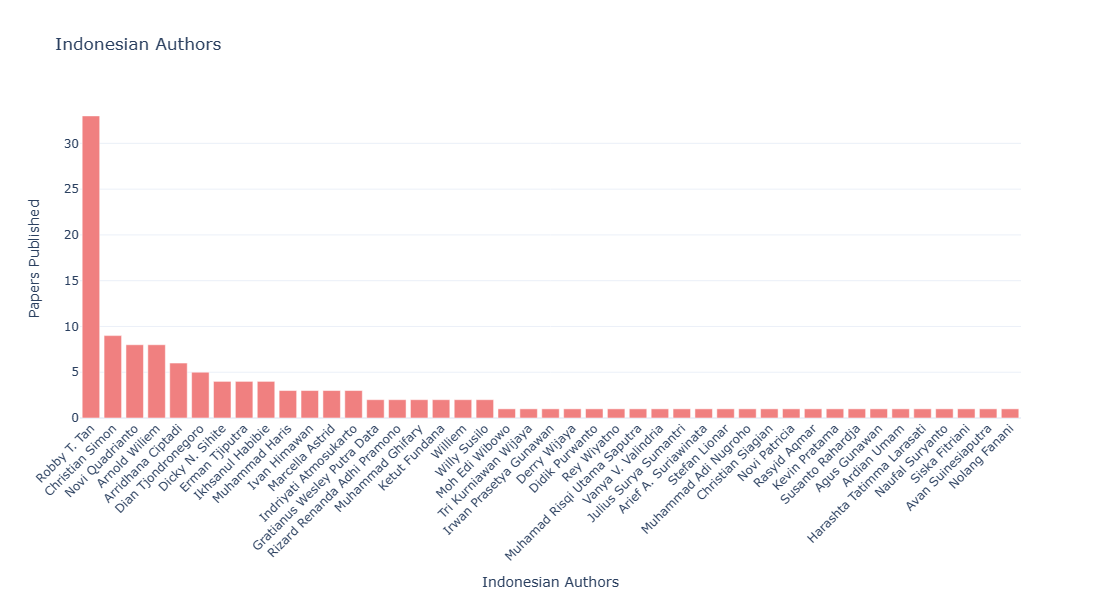

In [19]:
fig = px.bar(indonesian_authors, y='Papers Published', x='Indonesian Authors',
             title='Indonesian Authors', template='plotly_white',
             color_discrete_sequence=['LightCoral'])  
fig.update_layout(width=1000, height=600, showlegend=False, xaxis_autorange='reversed')
fig.update_xaxes(tickangle=-45, tickmode='array')
fig.show()

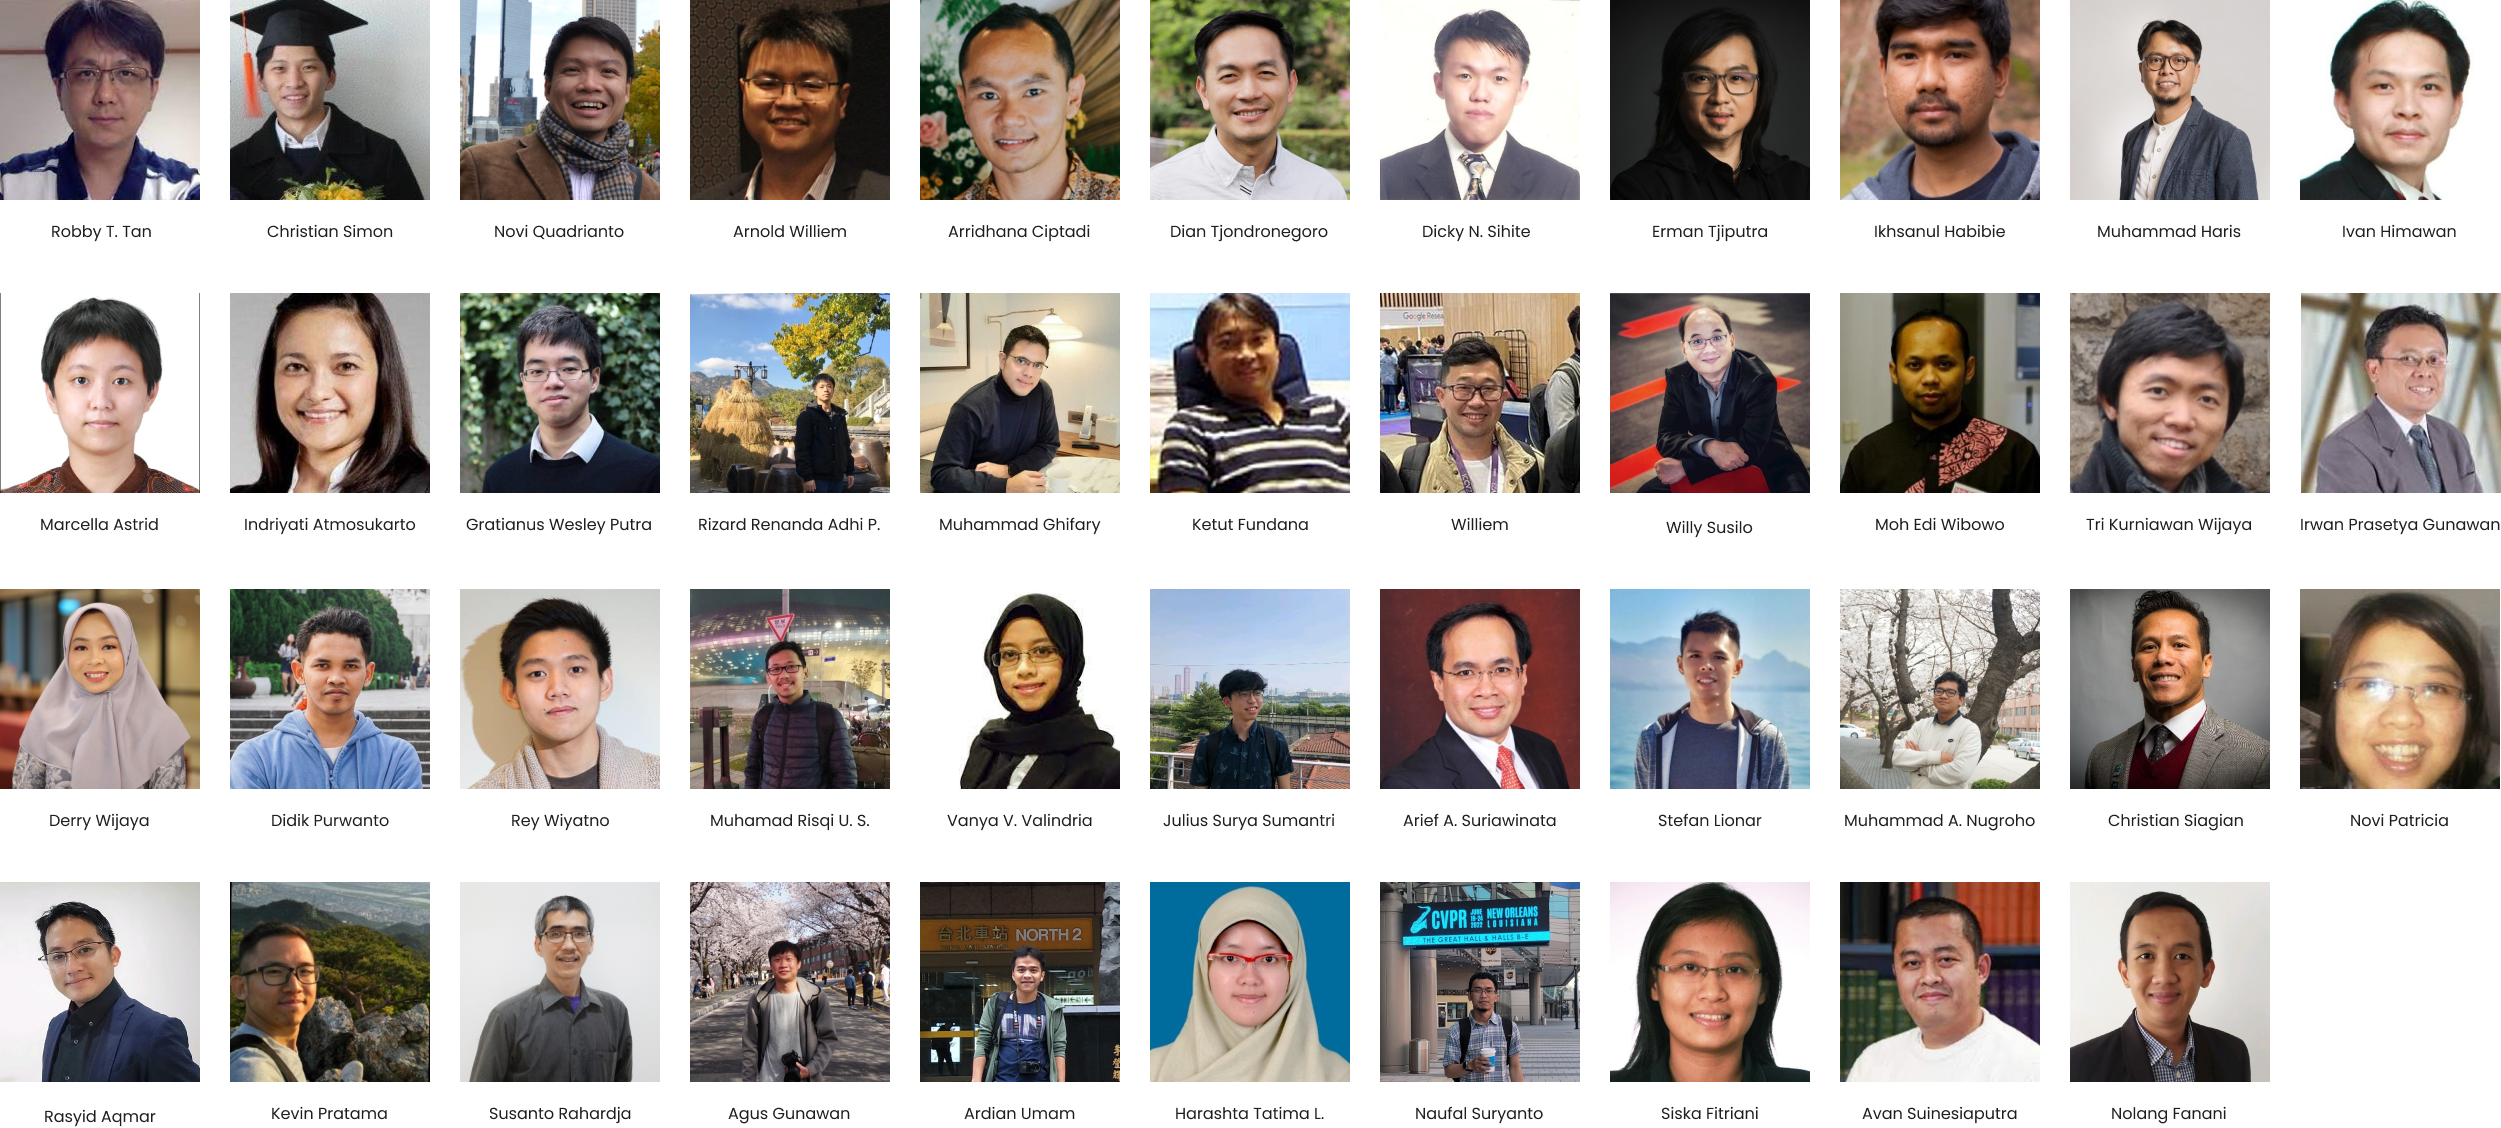

Below is the repository to the authors' webpages such as Profile, Google Scholar, and DBLP:

[Author Profiles](https://github.com/indonesia-vision-ai/awesome-indonesia-vision-research-conference/blob/main/AUTHORS.md)

## **All Papers WordCloud**

In [20]:
all_papers = pd.read_csv('data/All Papers.csv')
all_papers.head()

paper_title
0  : Joint Point Interaction-Dimension Search for...
1  'Dynamism of a Dog on a Leash' or Behavior Cla...
2  'Skimming-Perusal' Tracking: A Framework for R...
3  'The Pedestrian next to the Lamppost" Adaptive...
4  "Double-DIP": Unsupervised Image Decomposition...

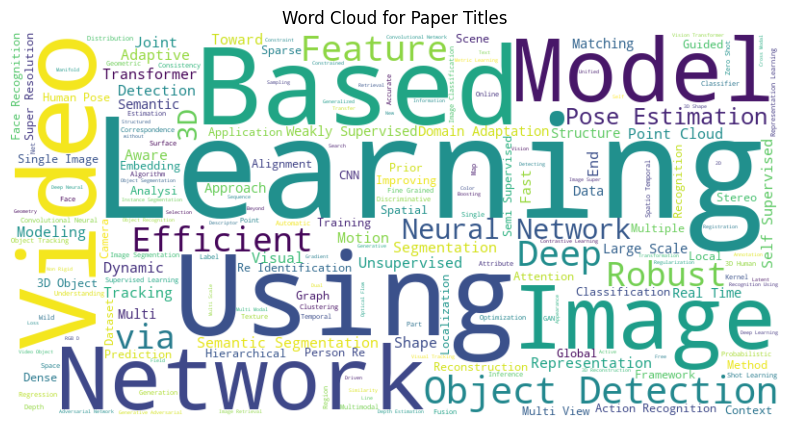

In [21]:
text = ' '.join(all_papers['paper_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Paper Titles')
plt.show()